In [1]:
! git init
! git pull https://github.com/serzaraisk/noisy_labels.git

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 139 (delta 61), reused 114 (delta 36), pack-reused 0
Receiving objects: 100% (139/139), 4.63 MiB | 24.08 MiB/s, done.
Resolving deltas: 100% (61/61), done.
From https://github.com/serzaraisk/noisy_labels
 * branch            HEAD       -> FETCH_HEAD


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
#! rm image_model/image_dataset -rf

In [3]:
 ! mkdir image_model/image_dataset
 ! tar -xvzf drive/MyDrive/HSE_diploma/Image_dataset/image_dataset.tar.gz -C image_model/image_dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
./train/2/7276.jpg
./train/2/8119.jpg
./train/2/9641.jpg
./train/2/8121.jpg
./train/2/7995.jpg
./train/2/7532.jpg
./train/2/7340.jpg
./train/2/10384.jpg
./train/2/9478.jpg
./train/2/9582.jpg
./train/2/9771.jpg
./train/2/8474.jpg
./train/2/7505.jpg
./train/2/9278.jpg
./train/2/8903.jpg
./train/2/9228.jpg
./train/2/8103.jpg
./train/2/8195.jpg
./train/2/7935.jpg
./train/2/7204.jpg
./train/2/7140.jpg
./train/2/9521.jpg
./train/2/8068.jpg
./train/2/9578.jpg
./train/2/7625.jpg
./train/2/7042.jpg
./train/2/9215.jpg
./train/2/10292.jpg
./train/2/10144.jpg
./train/2/9550.jpg
./train/2/8618.jpg
./train/2/8663.jpg
./train/2/10159.jpg
./train/2/8465.jpg
./train/2/9609.jpg
./train/2/8289.jpg
./train/2/9965.jpg
./train/2/10411.jpg
./train/2/9400.jpg
./train/2/8020.jpg
./train/2/8405.jpg
./train/2/7654.jpg
./train/2/8818.jpg
./train/2/9593.jpg
./train/2/7563.jpg
./train/2/9701.jpg
./train/2/9981.jpg
./train/2/9198.jpg
./train/2/7987.

In [4]:
! pip install timm

     |████████████████████████████████| 376 kB 5.0 MB/s 


## Step 1: Imports and Global variable init

In [8]:
from torch import cuda
DEVICE = 'cuda' if cuda.is_available() else 'cpu'
DESTINATION_FOLDER = 'image_model/models'
DATASETS_FOLDER = 'data'
TRAIN_TEST_RATIO = 0.9
TRAIN_VALID_RATIO = 0.8
FRACTION = 0.01
SAMPLE = None
PATH = '//home/images/dev/spochukaev/hse_diploma/image_classification'
BATCH_SIZE = 10
NUM_OF_WORKERS = 0

MODEL_NAME = 'tf_efficientnet_b4_ns'
efficientnet_input_sizes = {'tf_efficientnet_b0_ns':224,
'tf_efficientnet_b1_ns':240,
'tf_efficientnet_b2_ns':260,
'tf_efficientnet_b3_ns':300
#'tf_efficientnet_b4_ns':380,
#'tf_efficientnet_b5_ns':456,
#'tf_efficientnet_b6_ns':528,
#'tf_efficientnet_b7_ns':600
}
print(DEVICE)

cuda


## Step 2: Load Pytorch Dataset

In [6]:
# define my custom dataset for the task
from importlib import reload
import image_model.init_dataset_dataloader as init_dataset_dataloader
import image_model.model as model
import image_model.evaluation as evaluation
reload(init_dataset_dataloader)

<module 'image_model.init_dataset_dataloader' from '/content/image_model/init_dataset_dataloader.py'>

## Step 7 create model for noisy dataset

In [28]:
reload(model)
reload(init_dataset_dataloader)

<module 'image_model.init_dataset_dataloader' from '/content/image_model/init_dataset_dataloader.py'>

In [9]:
models = {}
efficientNet = 'tf_efficientnet_b3_ns'
last_layer = 128
BATCH_SIZE = 32
dataset_label = efficientNet + '_' + str(last_layer) + '_ground_truth'
noisy_model = dataset_label
models[dataset_label] = {}
models[dataset_label]['model'] = model.create_model(efficientNet, last_layer).to(DEVICE)
models[dataset_label]['datasets'] =  init_dataset_dataloader.create_datasets('image_model/', efficientnet_input_sizes[efficientNet])
models[dataset_label]['dataloaders']  = init_dataset_dataloader.create_dataloaders(models[dataset_label]['datasets'][0], 
                                                                                                                models[dataset_label]['datasets'][1], 
                                                                                                                models[dataset_label]['datasets'][2], 
                                                                                                                BATCH_SIZE, NUM_OF_WORKERS)
print(models.keys())

dict_keys(['tf_efficientnet_b3_ns_128_ground_truth'])


## Step 8: Training noisy model

In [14]:
import image_model.train_model as train_model
reload(train_model)

<module 'image_model.train_model' from '/content/image_model/train_model.py'>

100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Valid_loss decreased inf --> 0.8891712099313736
save model
Epoch : 1 Train Loss : 1.027211 Train Acc : 0.681659
Epoch : 1 Valid Loss : 0.889171 Valid Acc : 0.643828


100%|██████████| 80/80 [01:08<00:00,  1.17it/s]


Valid_loss decreased 0.8891712099313736 --> 0.866279362142086
save model
Epoch : 2 Train Loss : 1.017195 Train Acc : 0.692368
Epoch : 2 Valid Loss : 0.866279 Valid Acc : 0.676922


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Valid_loss decreased 0.866279362142086 --> 0.8525084644556046
save model
Epoch : 3 Train Loss : 1.008353 Train Acc : 0.703660
Epoch : 3 Valid Loss : 0.852508 Valid Acc : 0.680266


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Valid_loss decreased 0.8525084644556046 --> 0.845448050647974
save model
Epoch : 4 Train Loss : 1.003247 Train Acc : 0.716706
Epoch : 4 Valid Loss : 0.845448 Valid Acc : 0.682000


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 5 Train Loss : 1.011619 Train Acc : 0.716803
Epoch : 5 Valid Loss : 0.858386 Valid Acc : 0.664594


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 6 Train Loss : 1.005759 Train Acc : 0.720308
Epoch : 6 Valid Loss : 0.848157 Valid Acc : 0.697219


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Valid_loss decreased 0.845448050647974 --> 0.8311427906155586
save model
Epoch : 7 Train Loss : 0.991396 Train Acc : 0.729264
Epoch : 7 Valid Loss : 0.831143 Valid Acc : 0.679812


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 8 Train Loss : 1.004084 Train Acc : 0.731698
Epoch : 8 Valid Loss : 0.859892 Valid Acc : 0.671172


100%|██████████| 80/80 [01:08<00:00,  1.17it/s]


Epoch : 9 Train Loss : 1.006182 Train Acc : 0.732866
Epoch : 9 Valid Loss : 0.841226 Valid Acc : 0.695891


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 10 Train Loss : 1.008328 Train Acc : 0.731698
Epoch : 10 Valid Loss : 0.853517 Valid Acc : 0.681219


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 11 Train Loss : 0.996360 Train Acc : 0.736079
Epoch : 11 Valid Loss : 0.846088 Valid Acc : 0.691813


100%|██████████| 80/80 [01:09<00:00,  1.15it/s]


Valid_loss decreased 0.8311427906155586 --> 0.829516714066267
save model
Epoch : 12 Train Loss : 0.995036 Train Acc : 0.741920
Epoch : 12 Valid Loss : 0.829517 Valid Acc : 0.685609


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Valid_loss decreased 0.829516714066267 --> 0.8175881326198577
save model
Epoch : 13 Train Loss : 0.991076 Train Acc : 0.741725
Epoch : 13 Valid Loss : 0.817588 Valid Acc : 0.703641


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 14 Train Loss : 0.984362 Train Acc : 0.739194
Epoch : 14 Valid Loss : 0.823250 Valid Acc : 0.686344


100%|██████████| 80/80 [01:08<00:00,  1.16it/s]


Epoch : 15 Train Loss : 0.991171 Train Acc : 0.744646
Epoch : 15 Valid Loss : 0.828522 Valid Acc : 0.696109


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 16 Train Loss : 0.996834 Train Acc : 0.747761
Epoch : 16 Valid Loss : 0.830095 Valid Acc : 0.702469


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Valid_loss decreased 0.8175881326198577 --> 0.8135084711015225
save model
Epoch : 17 Train Loss : 0.982602 Train Acc : 0.751752
Epoch : 17 Valid Loss : 0.813508 Valid Acc : 0.700406


100%|██████████| 80/80 [01:09<00:00,  1.16it/s]


Valid_loss decreased 0.8135084711015225 --> 0.8116774089634419
save model
Epoch : 18 Train Loss : 0.982857 Train Acc : 0.747956
Epoch : 18 Valid Loss : 0.811677 Valid Acc : 0.697000


100%|██████████| 80/80 [01:07<00:00,  1.18it/s]


Epoch : 19 Train Loss : 0.998087 Train Acc : 0.756133
Epoch : 19 Valid Loss : 0.836715 Valid Acc : 0.689813


100%|██████████| 80/80 [01:08<00:00,  1.18it/s]


Epoch : 20 Train Loss : 0.992514 Train Acc : 0.752726
Epoch : 20 Valid Loss : 0.841595 Valid Acc : 0.689141
Model saved to ==> image_model/models/tf_efficientnet_b3_ns_128_ground_truth/tf_efficientnet_b3_ns_128_ground_truth_metrics.pt


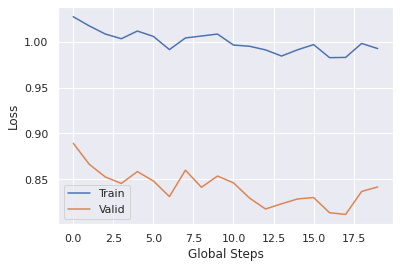

In [17]:
import torch
from torch import nn

EPOCHS = 20
LR = 0.0001

for model_ in models.keys():
    criterion = nn.CrossEntropyLoss().to(DEVICE)
    optimizer = torch.optim.Adam(models[noisy_model]['model'].parameters(),lr = LR)
    trainer = train_model.ImageTrainer(DEVICE, model_,use_ground_for_training=False, use_ground_for_validate=False, criterion=criterion,optimizer=optimizer, alpha=1)
    trainer.fit(models[noisy_model]['model'],models[noisy_model]['dataloaders'][0],models[noisy_model]['dataloaders'][1],EPOCHS, DESTINATION_FOLDER)

## Step 9: Evaluation for noisy model

In [18]:
import image_model.evaluation as evaluation
reload(evaluation)

<module 'image_model.evaluation' from '/content/image_model/evaluation.py'>

100%|██████████| 45/45 [00:37<00:00,  1.19it/s]


Classification Report for model tf_efficientnet_b3_ns_128_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7031    0.6743    0.6884       439
  OK quality     0.6451    0.5558    0.5971       484
Good quality     0.6717    0.7839    0.7235       509

    accuracy                         0.6732      1432
   macro avg     0.6733    0.6713    0.6697      1432
weighted avg     0.6723    0.6732    0.6700      1432



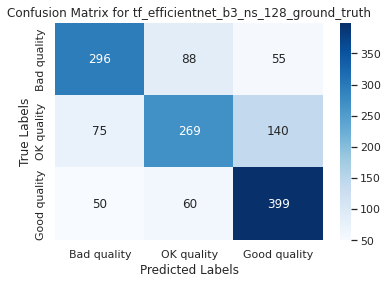

In [19]:
evaluation.load_checkpoint('image_model/models/' + noisy_model + '/' + noisy_model + '.pt', models[noisy_model]['model'])
models[noisy_model]['accuracy'] = evaluation.evaluate(models[noisy_model]['model'], noisy_model, models[noisy_model]['dataloaders'][2], DEVICE)

In [ ]:
if os.path.isdir('models'):
    shutil.rmtree('models')
if os.path.isdir('lookup_tables'):
    shutil.rmtree('lookup_tables')
if os.path.isdir('image_dataset'):
    shutil.rmtree('image_dataset')